**Modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,plot_confusion_matrix
import warnings 
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Mini Project EV**

In [ ]:
df = pd.read_csv('CleanedEV.csv')
df

,HFUEL,HHFAMINC,HOMEOWN,HHSIZE,YOUNGCHILD,HHVEHCNT,URBRUR,HTPPOPDN,PRICE,PLACE,R_AGE_IMP,R_SEX_IMP,EDUC,R_RACE,GT1JBLWK,OCCAT,CARSHARE,TIMETOWK,YEARMILE
0,1,2,0,2,0,0,1,6,3,2,45,0,2,1,0,3,0,5,10000
1,1,5,0,2,0,3,1,2,5,5,19,0,3,6,0,1,0,15,20000
2,1,5,1,2,0,2,1,4,2,2,58,0,3,1,0,4,0,50,35000
3,1,4,0,2,0,1,1,6,3,4,57,1,5,6,0,4,0,45,6700
4,1,4,0,2,0,2,1,6,3,3,56,1,1,1,0,3,0,10,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,0,2,0,3,0,0,0,7,2,2,28,0,4,1,0,4,0,25,10000
3148,0,3,1,1,0,1,0,6,3,3,45,0,4,1,0,4,0,15,8000
3149,0,2,1,2,0,2,1,6,3,2,26,1,3,1,0,3,0,10,20000
3150,0,4,1,1,0,3,0,2,2,4,41,1,4,1,0,4,0,10,30000


In [ ]:
X = df.drop("HFUEL",1) #Independent Variables
y = df[['HFUEL']] #Class Target 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=1)

In [ ]:
model_logis1 = LogisticRegression()
classifier = model_logis1.fit(X_train,y_train)

In [ ]:
ypred_test = model_logis1.predict(X_test)
acc=format(accuracy_score(y_test,ypred_test), "0.2%")
print("Accuracy : ",acc)

Accuracy :  93.35%


[[295   0]
 [ 21   0]]


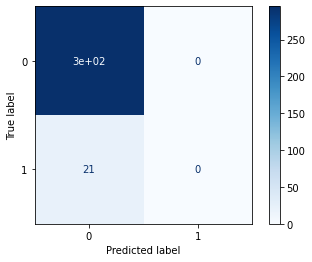

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["0", "1"],cmap=plt.cm.Blues)
print(disp.confusion_matrix)

In [ ]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       295
           1       0.00      0.00      0.00        21

    accuracy                           0.93       316
   macro avg       0.47      0.50      0.48       316
weighted avg       0.87      0.93      0.90       316



In [ ]:
plt.show()

**SMOTE**

In [ ]:
X_oversampling = df.drop(columns=['HFUEL'])
y_oversampling = df[['HFUEL']]
Oversampling = SMOTE()
X_oversampling , y_oversampling = Oversampling.fit_resample(X_oversampling,y_oversampling)

In [ ]:
name = []

for i in df.drop(columns=['HFUEL']):
  name.append(i)

df_new = pd.DataFrame(data = X_oversampling, columns= name)
df_new['HFUEL'] = y_oversampling

print(df.groupby(['HFUEL']).size().reset_index(name='counts'))
print(df_new.groupby(['HFUEL']).size().reset_index(name='counts')) 


   HFUEL  counts
0      0    3000
1      1     152
   HFUEL  counts
0      0    3000
1      1    3000


In [ ]:
X_trainO, X_testO, y_trainO, y_testO = train_test_split(X_oversampling, y_oversampling, test_size = 0.2)

In [ ]:
model_logis2 = LogisticRegression()
classifier = model_logis2.fit(X_trainO,y_trainO)

In [ ]:
ypred_test = model_logis2.predict(X_testO)
acc=format(accuracy_score(y_testO,ypred_test), "0.2%")
print("Accuracy : ",acc)

Accuracy :  63.75%


[[373 207]
 [228 392]]


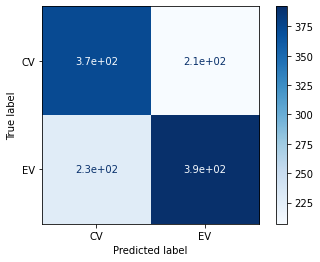

In [ ]:
disp = plot_confusion_matrix(classifier, X_testO, y_testO, display_labels=["CV", "EV"],cmap=plt.cm.Blues)
print(disp.confusion_matrix)

In [ ]:
print(classification_report(y_testO,ypred_test))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       580
           1       0.65      0.63      0.64       620

    accuracy                           0.64      1200
   macro avg       0.64      0.64      0.64      1200
weighted avg       0.64      0.64      0.64      1200



In [ ]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]



#Using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', cv=10)
model.fit(X_train, y_train)



print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.4787676092023918
